In [6]:
from scipy import stats
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('My_Data1.csv')
df.describe()

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,12137.965769,-0.365689,-0.339065,43.625674,-0.350000,-0.323693,49.236133,-0.293502,-0.164501,27.086529,-0.283122,-0.144057,26.193344
std,4247.052729,1.154280,0.549535,57.674114,1.156894,0.549216,62.207512,1.099027,0.406432,52.872975,1.085303,0.383824,53.211689
min,6354.000000,-8.000000,-5.000000,0.000000,-9.500000,-5.000000,0.000000,-9.000000,-3.000000,0.000000,-9.000000,-3.000000,0.000000
25%,8409.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,0.000000,-0.500000,0.000000,0.000000,-0.500000,0.000000,0.000000
50%,11270.000000,-0.250000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15408.000000,0.000000,0.000000,90.000000,0.000000,0.000000,92.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
max,21678.000000,7.000000,3.000000,180.000000,10.500000,2.500000,180.000000,3.500000,2.000000,180.000000,3.500000,1.500000,180.000000


In [8]:
df.head(10)

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L
0,10701,-6.25,-0.75,38,-6.25,-0.75,168,-5.50,0.00,0,-5.50,0.00,0
1,19268,-1.00,-2.00,4,-2.00,-1.75,6,-0.50,-1.50,180,-1.50,-1.00,180
2,7008,-6.00,-1.00,90,-5.75,-1.00,80,-5.00,0.00,0,-5.50,0.00,0
3,15593,-6.00,0.00,0,-6.00,0.00,0,-5.50,0.00,0,-5.50,0.00,0
4,8455,-1.75,-2.50,8,-2.25,-1.75,171,-1.50,-1.50,10,-1.75,-1.00,170
5,18933,0.75,-2.00,90,0.75,-1.75,90,0.75,-2.00,90,0.75,-1.75,90
6,19921,-2.50,-1.50,90,-2.50,-1.50,90,-2.50,-1.50,90,-2.50,-1.50,90
7,7826,-1.75,-2.00,90,-1.75,-2.00,90,-1.75,-2.00,90,-1.75,-1.75,80
8,7382,-3.00,-1.50,17,-3.75,-1.50,165,-3.25,-0.75,15,-3.25,-0.75,165
9,14279,0.00,0.75,170,0.00,1.00,180,0.00,0.75,170,0.00,1.00,180


In [9]:
df.shape

(3155, 13)

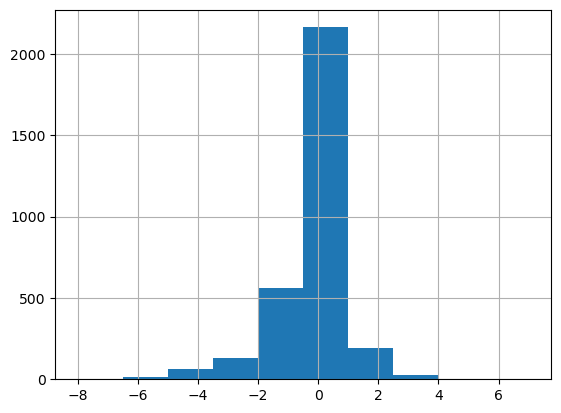

In [10]:
df["SPH AB - R"].hist();

In [11]:
mean_aqi_log = df["SPH AB - R"].mean()
print(mean_aqi_log)

-0.365689381933439


In [12]:
std_aqi_log = df["SPH AB - R"].std()
print(std_aqi_log)

1.1542803602923655


In [13]:
lower_limit = mean_aqi_log - 1 * std_aqi_log
upper_limit = mean_aqi_log + 1 * std_aqi_log
print(lower_limit, upper_limit)

-1.5199697422258045 0.7885909783589264


In [14]:
((df["SPH AB - R"] >= lower_limit) & (df["SPH AB - R"] <= upper_limit)).mean() * 100

83.2012678288431

In [15]:
lower_limit = mean_aqi_log - 2 * std_aqi_log
upper_limit = mean_aqi_log + 2 * std_aqi_log
print(lower_limit, upper_limit)

-2.6742501025181697 1.942871338651292


In [16]:
((df["SPH AB - R"] >= lower_limit) & (df["SPH AB - R"] <= upper_limit)).mean() * 100

92.74167987321712

In [17]:
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log
print(lower_limit, upper_limit)

-3.828530462810535 3.0971516989436574


In [18]:
((df["SPH AB - R"] >= lower_limit) & (df["SPH AB - R"] <= upper_limit)).mean() * 100

97.40095087163233

In [19]:
df["z_score"] = stats.zscore(df["SPH AB - R"], ddof=1) # ddof=degrees of freedom correction 
df.head()

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score
0,10701,-6.25,-0.75,38,-6.25,-0.75,168,-5.5,0.0,0,-5.50,0.0,0,-5.097817
1,19268,-1.00,-2.00,4,-2.00,-1.75,6,-0.5,-1.5,180,-1.50,-1.0,180,-0.549529
2,7008,-6.00,-1.00,90,-5.75,-1.00,80,-5.0,0.0,0,-5.50,0.0,0,-4.881232
3,15593,-6.00,0.00,0,-6.00,0.00,0,-5.5,0.0,0,-5.50,0.0,0,-4.881232
4,8455,-1.75,-2.50,8,-2.25,-1.75,171,-1.5,-1.5,10,-1.75,-1.0,170,-1.199285


In [23]:
sorteddf = df[(df["z_score"] > 3) | (df["z_score"] < -3)]
sorteddf

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score
0,10701,-6.25,-0.75,38,-6.25,-0.75,168,-5.50,0.0,0,-5.50,0.0,0,-5.097817
2,7008,-6.00,-1.00,90,-5.75,-1.00,80,-5.00,0.0,0,-5.50,0.0,0,-4.881232
3,15593,-6.00,0.00,0,-6.00,0.00,0,-5.50,0.0,0,-5.50,0.0,0,-4.881232
13,17079,-5.00,0.00,0,-6.00,0.00,0,-5.00,0.0,0,-6.00,0.0,0,-4.014892
16,8460,-6.00,-0.75,97,-6.00,-1.00,100,-5.00,0.0,0,-5.00,0.0,0,-4.881232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,10439,-4.25,-0.50,13,-4.25,-0.50,33,-4.00,0.0,0,-4.00,0.0,0,-3.365136
402,11700,-4.00,-0.25,92,-4.25,-0.50,95,-3.75,0.0,0,-3.75,0.0,0,-3.148551
449,8439,-4.50,-0.50,31,-1.50,-0.75,2,-2.75,0.0,0,-1.25,-0.5,180,-3.581721
469,17602,-5.00,0.00,0,-3.00,0.00,0,0.00,0.0,0,-2.50,0.0,0,-4.014892


In [24]:
# Assuming you already have sorteddf defined
df_cleaned = df.drop(sorteddf.index)
df_cleaned


,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score
1,19268,-1.00,-2.00,4,-2.00,-1.75,6,-0.50,-1.5,180,-1.50,-1.00,180,-0.549529
4,8455,-1.75,-2.50,8,-2.25,-1.75,171,-1.50,-1.5,10,-1.75,-1.00,170,-1.199285
5,18933,0.75,-2.00,90,0.75,-1.75,90,0.75,-2.0,90,0.75,-1.75,90,0.966567
6,19921,-2.50,-1.50,90,-2.50,-1.50,90,-2.50,-1.5,90,-2.50,-1.50,90,-1.849040
7,7826,-1.75,-2.00,90,-1.75,-2.00,90,-1.75,-2.0,90,-1.75,-1.75,80,-1.199285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,13939,0.00,-0.50,58,0.00,-0.50,44,0.00,0.0,0,0.00,0.00,0,0.316812
3151,7792,-0.50,-0.50,40,-0.75,-0.50,40,0.00,-0.5,40,-0.75,0.00,0,-0.116359
3152,9416,-0.25,-0.25,41,0.00,-0.50,49,0.00,0.0,0,0.00,0.00,0,0.100226
3153,11147,-0.75,-0.25,25,-0.25,-0.25,90,-0.50,0.0,0,-0.25,0.00,0,-0.332944


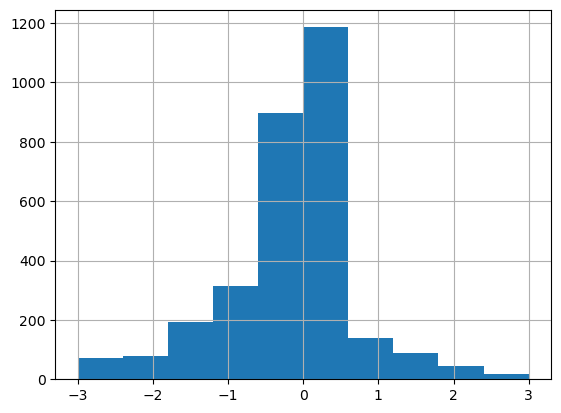

In [26]:
df_cleaned_filtered = df_cleaned[df_cleaned["SPH AB - R"] >= -3]
df_cleaned_filtered["SPH AB - R"].hist();

In [27]:
df_cleaned_filtered.describe()

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score
count,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000
mean,12151.857850,-0.237714,-0.332701,43.353232,-0.228974,-0.318437,48.682058,-0.173978,-0.165485,27.576847,-0.168948,-0.144129,26.202177,0.110870
std,4254.196642,0.836740,0.543308,57.735157,0.895404,0.549414,62.110011,0.839912,0.409505,53.328418,0.851018,0.386228,53.190398,0.724902
min,6354.000000,-3.000000,-5.000000,0.000000,-5.000000,-5.000000,0.000000,-9.000000,-3.000000,0.000000,-9.000000,-3.000000,0.000000,-2.282210
25%,8404.250000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,0.000000,-0.250000,0.000000,0.000000,-0.250000,0.000000,0.000000,-0.116359
50%,11287.500000,-0.250000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100226
75%,15417.500000,0.000000,0.000000,90.000000,0.000000,0.000000,92.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.316812
max,21678.000000,3.000000,3.000000,180.000000,10.500000,2.500000,180.000000,2.750000,2.000000,180.000000,3.000000,1.500000,180.000000,2.915834


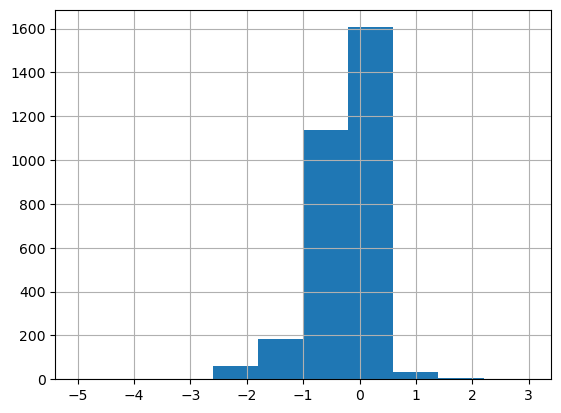

In [30]:
df_cleaned_filtered["CYL AB - R"].hist();

In [33]:
df_cleaned_filtered["z_score2"] = stats.zscore(df_cleaned_filtered["CYL AB - R"], ddof=1) # ddof=degrees of freedom correction 
sorteddf1 = df_cleaned_filtered[(df_cleaned_filtered["z_score2"] > 3) | (df_cleaned_filtered["z_score2"] < -3)]
sorteddf1

C:\Users\dkind\AppData\Local\Temp\ipykernel_39404\3814719709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered["z_score2"] = stats.zscore(df_cleaned_filtered["CYL AB - R"], ddof=1) # ddof=degrees of freedom correction


,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score,z_score2
1,19268,-1.00,-2.00,4,-2.00,-1.75,6,-0.50,-1.50,180,-1.50,-1.00,180,-0.549529,-3.068793
4,8455,-1.75,-2.50,8,-2.25,-1.75,171,-1.50,-1.50,10,-1.75,-1.00,170,-1.199285,-3.989082
5,18933,0.75,-2.00,90,0.75,-1.75,90,0.75,-2.00,90,0.75,-1.75,90,0.966567,-3.068793
7,7826,-1.75,-2.00,90,-1.75,-2.00,90,-1.75,-2.00,90,-1.75,-1.75,80,-1.199285,-3.068793
12,15777,-1.50,-2.00,90,-1.50,-2.00,90,-1.50,-2.00,90,-1.50,-2.00,90,-0.982699,-3.068793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,9267,-0.50,-2.00,91,0.00,0.00,0,0.00,-1.50,91,0.00,0.00,0,-0.116359,-3.068793
717,15274,0.00,-2.25,20,0.00,-0.50,90,0.00,-2.00,20,0.00,0.00,0,0.316812,-3.528938
738,8592,-0.50,-2.00,17,-0.75,-1.00,7,0.00,0.00,0,-0.50,-0.50,180,-0.116359,-3.068793
769,7972,-0.25,-2.50,83,-0.50,-1.00,79,0.00,-1.00,80,0.00,-0.25,80,0.100226,-3.989082


In [35]:
df_cleaned1 = df_cleaned_filtered.drop(sorteddf1.index)
df_cleaned1

,ID,SPH AB - R,CYL AB - R,Axis AB - R,SPH AB - L,CYL AB - L,Axis AB - L,SPH SR - R,CYL SR - R,Axis SR - R,SPH SR - L,CYL SR - L,Axis SR - L,z_score,z_score2
6,19921,-2.50,-1.50,90,-2.50,-1.50,90,-2.50,-1.50,90,-2.50,-1.50,90,-1.849040,-2.148504
8,7382,-3.00,-1.50,17,-3.75,-1.50,165,-3.25,-0.75,15,-3.25,-0.75,165,-2.282210,-2.148504
9,14279,0.00,0.75,170,0.00,1.00,180,0.00,0.75,170,0.00,1.00,180,0.316812,1.992796
10,11713,-1.25,-1.25,2,-1.00,-2.75,162,-1.00,-1.00,180,-0.50,-2.00,160,-0.766114,-1.688360
11,6710,3.00,-0.50,0,0.50,-4.00,70,2.50,0.00,0,0.50,-2.25,0,2.915834,-0.307926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,13939,0.00,-0.50,58,0.00,-0.50,44,0.00,0.00,0,0.00,0.00,0,0.316812,-0.307926
3151,7792,-0.50,-0.50,40,-0.75,-0.50,40,0.00,-0.50,40,-0.75,0.00,0,-0.116359,-0.307926
3152,9416,-0.25,-0.25,41,0.00,-0.50,49,0.00,0.00,0,0.00,0.00,0,0.100226,0.152218
3153,11147,-0.75,-0.25,25,-0.25,-0.25,90,-0.50,0.00,0,-0.25,0.00,0,-0.332944,0.152218


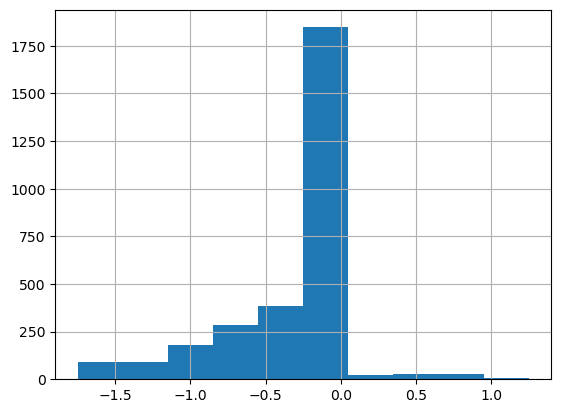

In [36]:
df_cleaned1["CYL AB - R"].hist();